En este proyecto se busca conocerla variación de las temperaturas de las regiones del país en el tiempo. 

Para ello, se emplea la librería [meteostat](https://pypi.org/project/meteostat/), que posee una función que nos retorna las temperaturas dado un rango de fechas, y la ubicación en términos de longitud, latitud y altitud.

#Pre-Processing

In [ ]:
!pip install meteostat

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [5]:
#Definimos la función que obtiene la latitud y longitud dado el país y la región.
def hallar_coordenadas(pais,region):
    if region == "Cuzco":
      region = region.replace("z","s")
    pais = pais.lower()
    region = region.lower()
    a,b = 'áéíóúü','aeiouu'
    trans = region.maketrans(a,b)
    region = region.translate(trans)
    region = region.replace(" ","-")
    url = "https://www.geodatos.net/coordenadas/"+pais+"/"+ region
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    soup.title
    latitude = float(soup.find_all("td")[1].get_text())
    longitude = float(soup.find_all("td")[2].get_text())
    coordenadas = [latitude, longitude]
    return coordenadas

def hallar_temperatura(capital,latitude,longitude,altitude,df2):
  start = datetime(2010,1,1)
  end = datetime(2022,12,31)
  lugar = Point(latitude,longitude,altitude)
  data = Daily(lugar, start, end)
  data = data.fetch()
  data = data.iloc[:,0:3]
  data= data.reset_index()
  data.insert(0, 'capital',capital)
  df2 = pd.concat([df2, data], axis=0)
  return df2


In [2]:
#Hacemos web scraping
url = "https://www.sport-histoire.fr/es/Geografia/Lista_departamentos_regiones_Peru.php"
response = requests.get(url)
html = response.content
soup = bs(html, "lxml")

In [3]:
rows = soup.find('table').find('tbody').find_all('tr')

In [4]:
#Obtenemos las regiones y capitales de nuestro país
regions = []
capitals = []
for row in rows:
  if rows.index(row) == 15:
        regions.append(row.find_all("td")[0].get_text())
        capitals.append(row.find_all("td")[1].get_text())  
  else:
    regions.append(row.find_all("td")[1].get_text())
    capitals.append(row.find_all("td")[2].get_text())  
print(regions)
print(capitals)

['Amazonas', 'Áncash', 'Apurímac', 'Arequipa', 'Ayacucho', 'Cajamarca', 'Callao', 'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'Junín', 'La Libertad', 'Lambayeque', 'Lima Metropolitana', 'Lima (departamento)', 'Loreto', 'Madre de Dios', 'Moquegua', 'Pasco', 'Piura', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 'Ucayali']
['Chachapoyas', 'Huaraz', 'Abancay', 'Arequipa', 'Ayacucho', 'Cajamarca', 'Callao', 'Cuzco', 'Huancavelica', 'Huánuco', 'Ica', 'Huancayo', 'Trujillo', 'Chiclayo', 'Lima', 'Huacho', 'Iquitos', 'Puerto Maldonado', 'Moquegua', 'Cerro de Pasco', 'Piura', 'Puno', 'Moyobamba', 'Tacna', 'Tumbes', 'Pucallpa']


In [8]:
pais = "PERU"
latitude = []
longitude = []
for capital in capitals:
  coordenadas = hallar_coordenadas(pais,capital)
  latitude.append(coordenadas[0])
  longitude.append(coordenadas[1])

In [9]:
#Obtenemos el dataset
data = [regions,capitals,latitude, longitude]
columns = ["Region","Capital","Latitude","Longitude"]
df = pd.DataFrame(columns = columns)
df["Region"] = regions
df["Capital"] = capitals
df["Latitude"] = latitude
df["Longitude"] = longitude

df

,Region,Capital,Latitude,Longitude
0,Amazonas,Chachapoyas,-6.23169,-77.86903
1,Áncash,Huaraz,-9.52779,-77.52778
2,Apurímac,Abancay,-13.63389,-72.88139
3,Arequipa,Arequipa,-16.39889,-71.53500
4,Ayacucho,Ayacucho,-13.15878,-74.22321
5,Cajamarca,Cajamarca,-7.16378,-78.50027
6,Callao,Callao,-12.05659,-77.11814
7,Cusco,Cuzco,-13.52264,-71.96734
8,Huancavelica,Huancavelica,-12.78261,-74.97266
9,Huánuco,Huánuco,-9.93062,-76.24223


In [10]:
# Leemos el archivo donde se encuentra la altitud
data_alt = pd.read_csv("https://raw.githubusercontent.com/JassonJara6/PortfolioProjects/main/datasets/datos_altitudes.csv",encoding= 'unicode_escape')
data_alt

,Departamento,Capital,Superficie,Altitud
0,Amazonas,Chachapoyas,39249,2339
1,Áncash,Huaraz,35915,3038
2,Apurímac,Abancay,20896,2392
3,Arequipa,Arequipa,63345,2337
4,Ayacucho,Ayacucho,43815,2760
5,Cajamarca,Cajamarca,33318,2719
6,Callao,Callao,147,3
7,Cusco,Cusco,71987,3414
8,Huancavelica,Huancavelica,22131,3679
9,Huánuco,Huánuco,36849,1898


In [12]:
df["Altitude"] = data_alt["Altitud"]

In [13]:
#Obtenemos el dataset completo
df

,Region,Capital,Latitude,Longitude,Altitude
0,Amazonas,Chachapoyas,-6.23169,-77.86903,2339
1,Áncash,Huaraz,-9.52779,-77.52778,3038
2,Apurímac,Abancay,-13.63389,-72.88139,2392
3,Arequipa,Arequipa,-16.39889,-71.53500,2337
4,Ayacucho,Ayacucho,-13.15878,-74.22321,2760
5,Cajamarca,Cajamarca,-7.16378,-78.50027,2719
6,Callao,Callao,-12.05659,-77.11814,3
7,Cusco,Cuzco,-13.52264,-71.96734,3414
8,Huancavelica,Huancavelica,-12.78261,-74.97266,3679
9,Huánuco,Huánuco,-9.93062,-76.24223,1898


#Visualización de la data

In [17]:
df2 = pd.DataFrame(columns = ["capital","time","tavg","tmax","tmin"])

In [18]:
for i in range(len(capitals)):
  capital = df["Capital"][i] 
  latitude = df["Latitude"][i] 
  longitude = df["Longitude"][i] 
  altitude = df["Altitude"][i] 
  df2 = hallar_temperatura(capital,latitude,longitude,altitude,df2)

In [19]:
df2.drop(["index"],axis = 1, inplace = True)
df2 = df2.reset_index()
df2.drop(["index"],axis = 1, inplace = True)

In [20]:
df2

,capital,time,tavg,tmax,tmin
0,Chachapoyas,2010-05-29,17.6,NaN,NaN
1,Chachapoyas,2010-05-30,NaN,NaN,NaN
2,Chachapoyas,2010-05-31,NaN,NaN,NaN
3,Chachapoyas,2010-06-01,NaN,NaN,NaN
4,Chachapoyas,2010-06-02,NaN,NaN,NaN
...,...,...,...,...,...
76460,Pucallpa,2022-12-27,26.1,31.9,21.1
76461,Pucallpa,2022-12-28,28.1,32.9,23.2
76462,Pucallpa,2022-12-29,26.1,32.9,22.9
76463,Pucallpa,2022-12-30,26.9,33.7,22.8


In [22]:
df2.to_csv("temperature_data.csv")

In [28]:
#Ejemplo: Cuzco
start = datetime(2010,1,1)
end = datetime(2022,12,31)
lugar = Point(-13.52264,-71.96734,3414)
data = Daily(lugar, start, end)

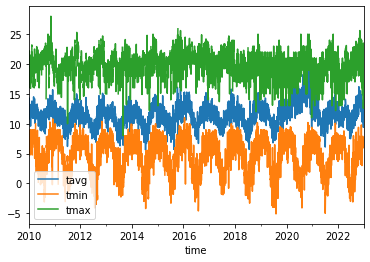

In [29]:
data = data.fetch()
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()